## Problem Statement
Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the objective is to predict the fare of the taxi ride using Random Forest.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('TaxiFare.csv', parse_dates=[2]) # 2 is the index of datetime column
print(type(df))
print(df.shape)
df.head()

<class 'pandas.core.frame.DataFrame'>
(50000, 8)


,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [3]:
df.columns

Index(['unique_id', 'amount', 'date_time_of_pickup', 'longitude_of_pickup',
       'latitude_of_pickup', 'longitude_of_dropoff', 'latitude_of_dropoff',
       'no_of_passenger'],
      dtype='object')

#### Renaming columns

In [4]:
df.columns = ['unique_id', 'amount', 'datetime', 'long_pickup', 'lat_pickup', 'long_drop', 'lat_drop', 'pass#']
df.head()

,unique_id,amount,datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass#
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


In [5]:
df.dtypes
# pd['datetime'] = pd.to_datetime(df['datetime'])

unique_id                   object
amount                     float64
datetime       datetime64[ns, UTC]
long_pickup                float64
lat_pickup                 float64
long_drop                  float64
lat_drop                   float64
pass#                        int64
dtype: object

In [6]:
df1 = df.copy()

### Feature Engineering

In [7]:
df['Year'] = df['datetime'].dt.year
df['Qtr'] = df['datetime'].apply(lambda x: x.quarter)
df['Month'] = df['datetime'].apply(lambda x: x.month)
df['Day'] = df['datetime'].apply(lambda x: x.day)
df['Hour'] = df['datetime'].dt.hour
df['Minute'] = df['datetime'].dt.minute
df.head()

,unique_id,amount,datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Year,Qtr,Month,Day,Hour,Minute
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,26
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,52
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,35
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,30
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,51


## EDA

#### Distribution of Year, Month, Qtr, Day and Hour - value_counts()

In [8]:
df.columns

Index(['unique_id', 'amount', 'datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass#', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'Minute'],
      dtype='object')

In [9]:
def feature_details(col):
    print('Count of Unique Values:', df[col].nunique())
    print(df[col].value_counts())
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
    
    sns.countplot(x=df[col],ax=ax1)
    ax1.set_title(f'Countplot for {col}')
    
    sns.boxplot(x=df[col], y=df['amount'], ax=ax2)
    ax2.set_title(f'Boxplot for {col} wrt Amount')
    
    plt.show()

Count of Unique Values: 7
2012    8005
2011    7832
2013    7819
2009    7716
2010    7646
2014    7530
2015    3452
Name: Year, dtype: int64


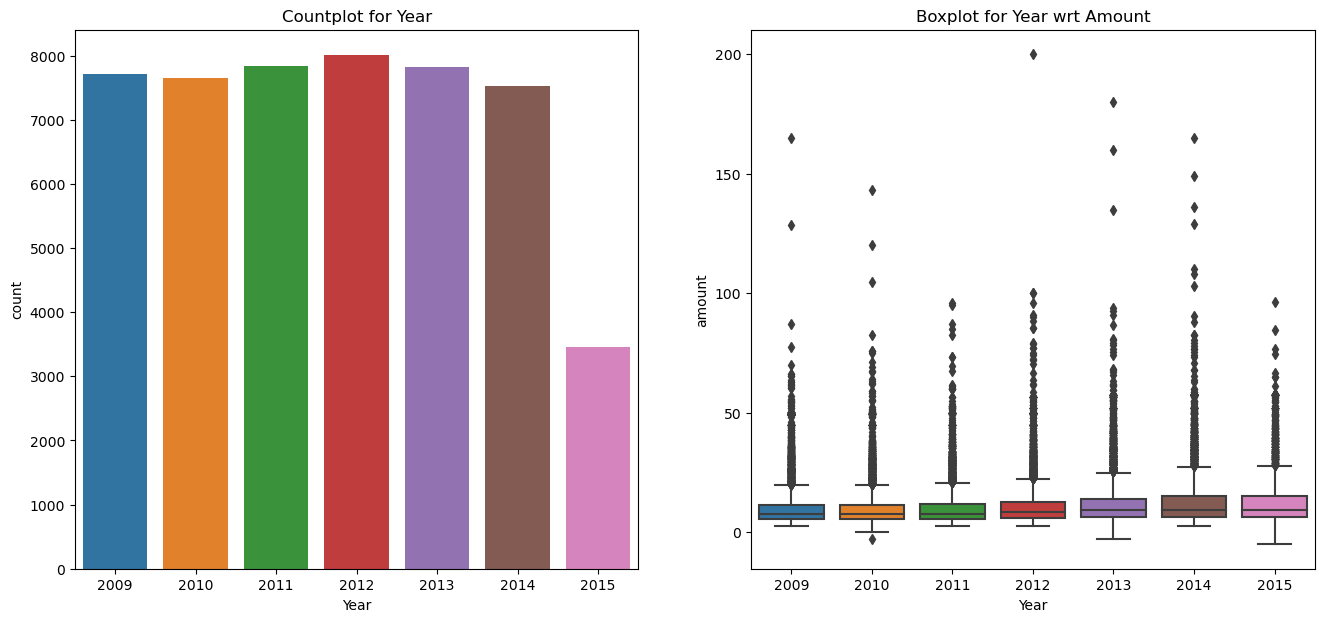

In [10]:
feature_details('Year')

#### inference:
Most rides belong to 2012 followed by 2011


Count of Unique Values: 4
2    13647
1    13519
4    11825
3    11009
Name: Qtr, dtype: int64


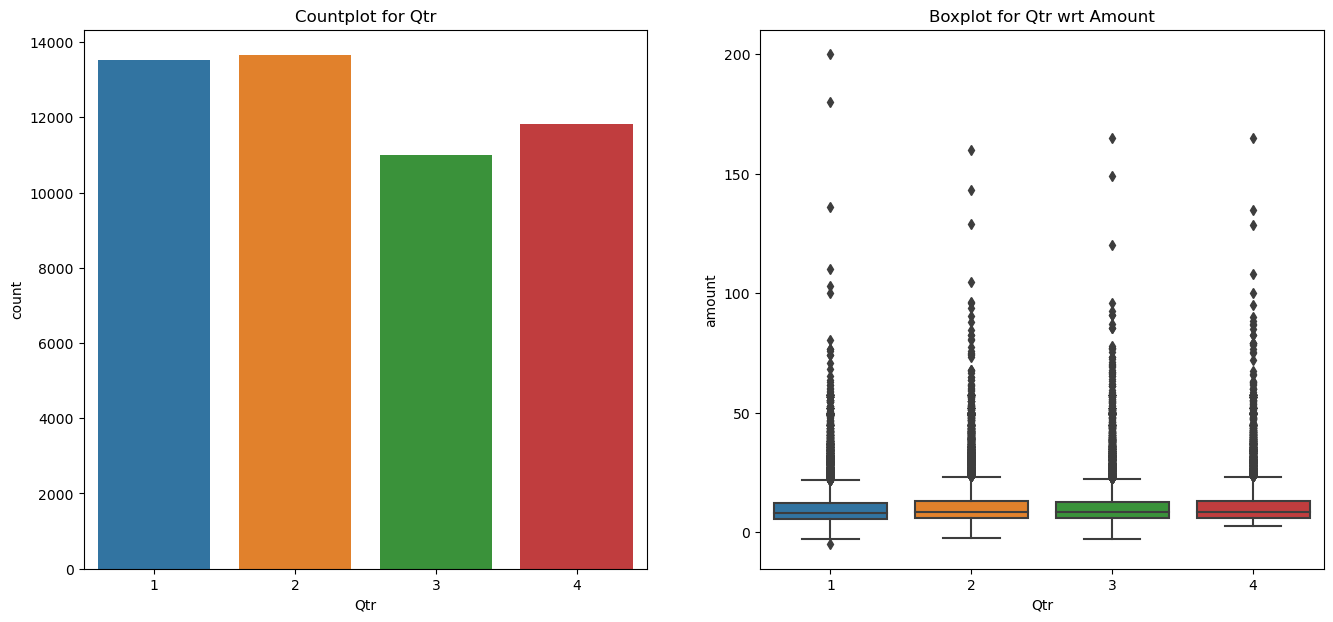

In [11]:
feature_details('Qtr')

#### inference:
1. Most rides belong Quarter 2

Count of Unique Values: 12
3     4671
5     4612
1     4546
4     4519
6     4516
2     4302
10    4046
12    4015
9     3810
11    3764
7     3656
8     3543
Name: Month, dtype: int64


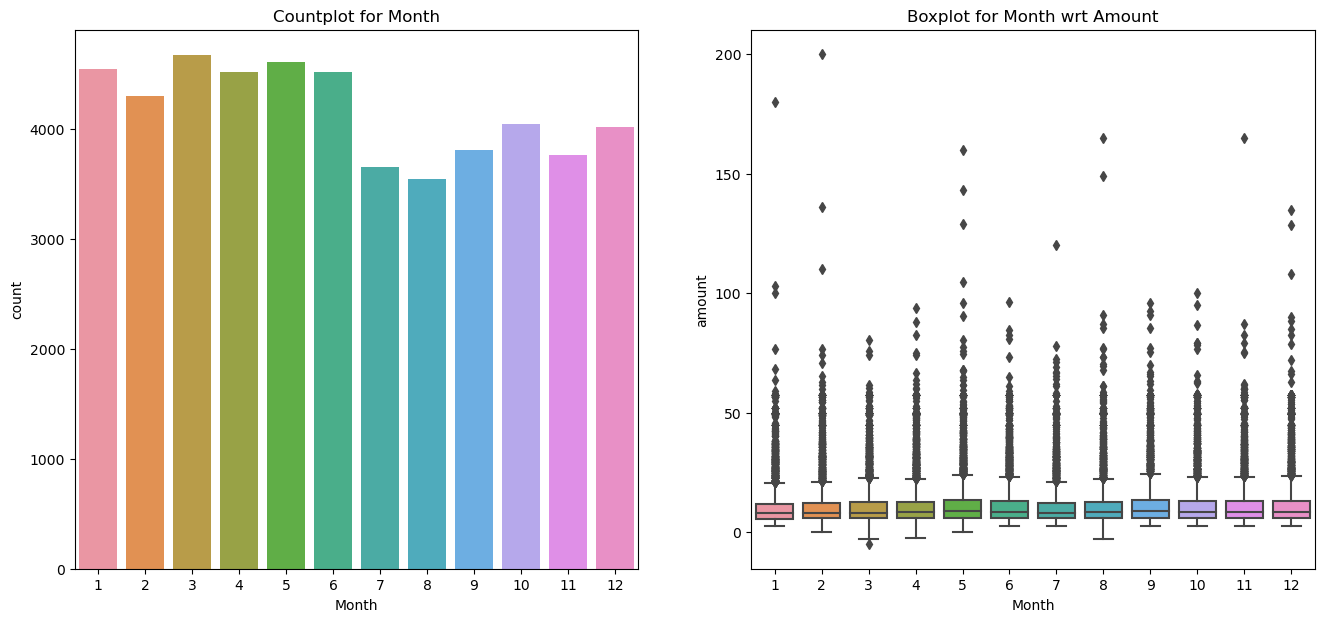

In [12]:
feature_details('Month')

#### inference:
Most rides were booked in March

Count of Unique Values: 24
19    3118
18    3077
20    2859
21    2817
22    2808
17    2490
13    2475
12    2471
14    2471
23    2467
9     2379
11    2357
15    2355
10    2259
8     2209
16    2045
7     1899
0     1890
1     1484
2     1088
6     1017
3      847
4      610
5      508
Name: Hour, dtype: int64


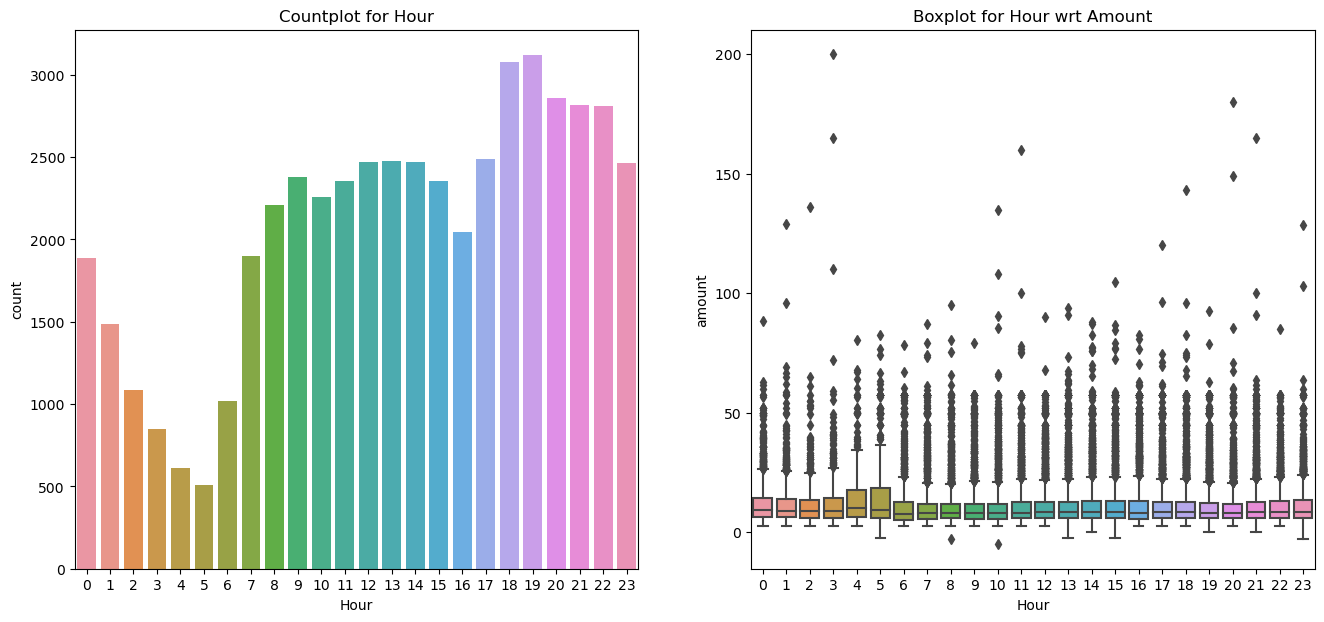

In [13]:
feature_details('Hour')

Count of Unique Values: 31
16    1771
12    1745
13    1743
21    1741
8     1717
15    1717
7     1709
19    1708
10    1691
22    1685
14    1680
9     1679
18    1676
23    1675
6     1671
17    1663
28    1652
2     1619
11    1614
20    1612
24    1609
25    1608
5     1599
3     1578
26    1545
1     1527
27    1518
4     1502
30    1443
29    1404
31     899
Name: Day, dtype: int64


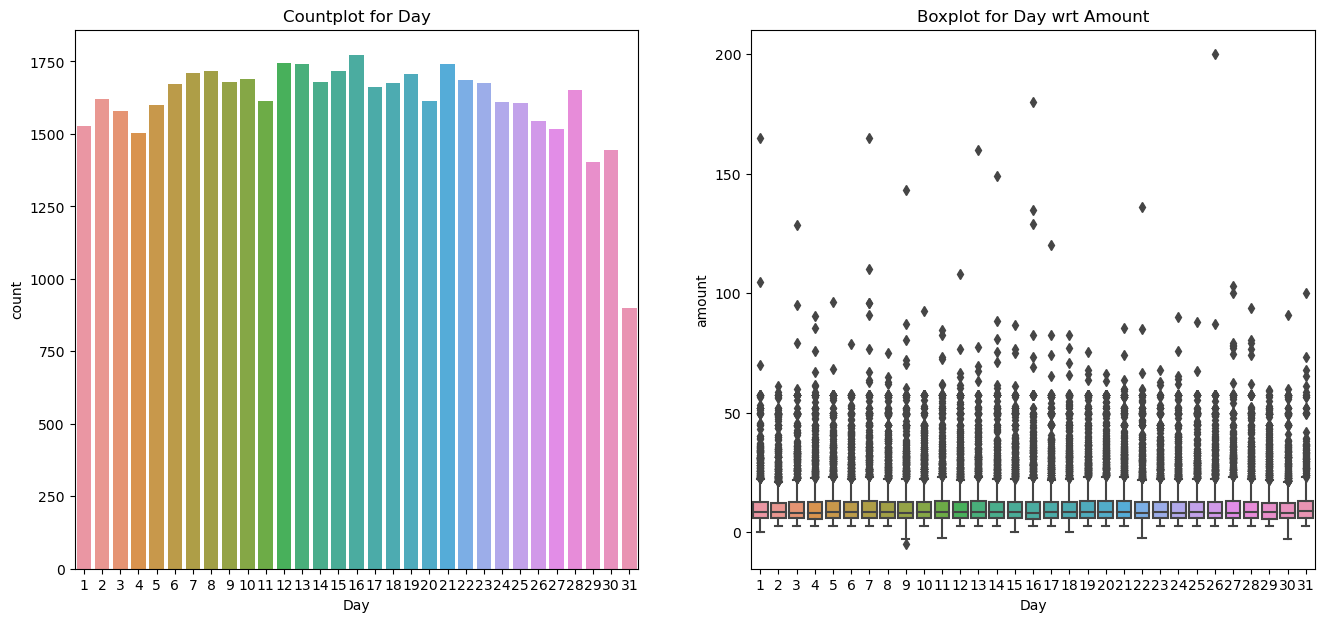

In [14]:
feature_details('Day')

#### Amount

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


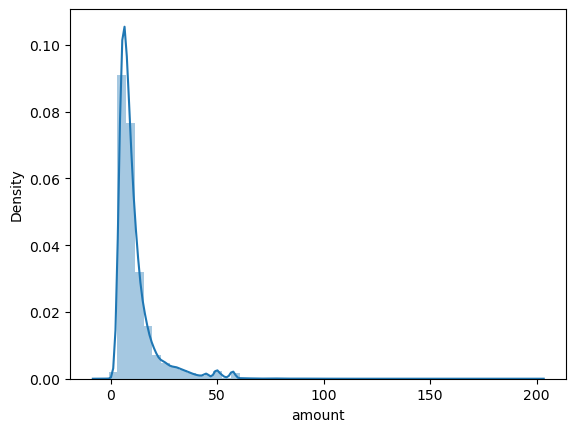

In [15]:
sns.distplot(df['amount'])
plt.show()

#### Handling Null Values

In [16]:
df.isnull().sum()

unique_id      0
amount         0
datetime       0
long_pickup    0
lat_pickup     0
long_drop      0
lat_drop       0
pass#          0
Year           0
Qtr            0
Month          0
Day            0
Hour           0
Minute         0
dtype: int64

#### Handling Duplicate Records

In [17]:
df.duplicated().sum()

0

In [18]:
df[df['amount']<=0].shape

(9, 14)

In [19]:
df = df[df['amount']>0]
df.shape

(49991, 14)

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


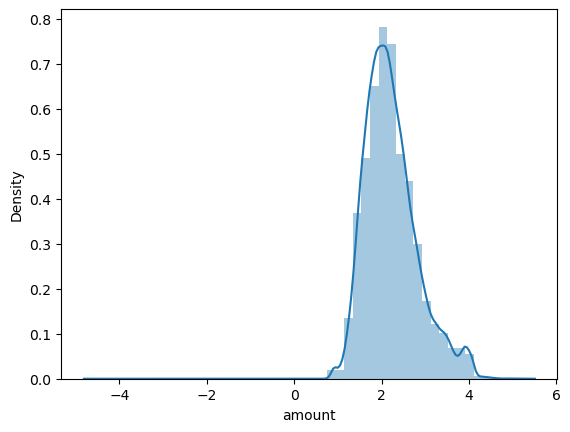

In [20]:
sns.distplot(np.log(df['amount']))
plt.show()

### Box-cox transformation

In [21]:
from scipy.stats import boxcox

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


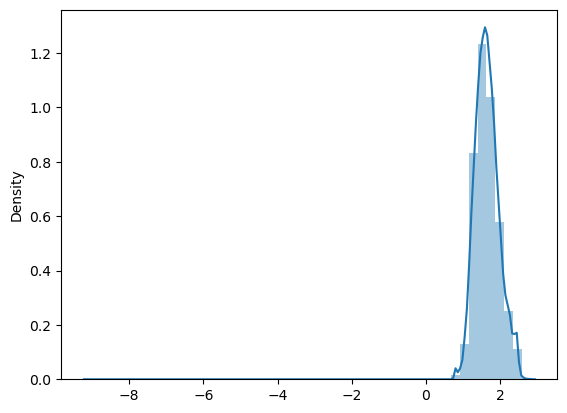

In [22]:
y_tf,param = boxcox(df['amount'])
sns.distplot(y_tf)
plt.show()

### Distance Formula
<b> Minkowski Distance = (|y2-y1|)**p + ((|x2-x1|)**p )** (1/p) <b> <br>
a. Euclidian Distance: (x1,y1), (x2,y2) = sqrt ((y2-y1)**2 + (x2-x1)**2) <br>
b. Manhattan Distance: (x1,y1), (x2,y2) = |y2-y1| + |x2-x1|

In [23]:
def minkowski(x1,x2,y1,y2,p): # long_pickup, long_drop,lat_pickup, lat_drop
    min_dist = (abs(x2-x1)**p + abs(y2-y1)**p)**(1/p)
    return min_dist

In [24]:
df['Euclid_dist'] = minkowski(df['lat_pickup'], df['lat_drop'], df['long_pickup'], df['long_drop'], 2)
df['Manhattan_dist'] = minkowski(df['lat_pickup'], df['lat_drop'], df['long_pickup'], df['long_drop'], 1)

In [25]:
df['abs_dist_lat'] = abs(df['lat_drop'] - df['lat_pickup'])
df['abs_dist_long'] = abs(df['long_drop'] - df['long_pickup'])

In [26]:
df.head()

,unique_id,amount,datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Year,Qtr,Month,Day,Hour,Minute,Euclid_dist,Manhattan_dist,abs_dist_lat,abs_dist_long
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,26,0.009436,0.011742,0.009041,0.002701
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,52,0.079696,0.107481,0.070701,0.036780
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,35,0.013674,0.019212,0.010708,0.008504
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,30,0.025340,0.029386,0.024949,0.004437
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,51,0.019470,0.027194,0.015754,0.011440


### Haversine Distance

We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formula boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).
Latitude and longitude are measured in radians

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

<img src="haversine_dist.png">

In [27]:
def haversine_np(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a)) # arcsin = sin^(-1)
    km = 6378 * c
    return km

In [28]:
df['haversine_dist'] = haversine_np(df['long_pickup'], df['lat_pickup'], df['long_drop'], df['lat_drop'])

In [29]:
df.head()

,unique_id,amount,datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Year,Qtr,Month,Day,Hour,Minute,Euclid_dist,Manhattan_dist,abs_dist_lat,abs_dist_long,haversine_dist
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,26,0.009436,0.011742,0.009041,0.002701,1.031896
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,52,0.079696,0.107481,0.070701,0.036780,8.459418
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,35,0.013674,0.019212,0.010708,0.008504,1.391052
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,30,0.025340,0.029386,0.024949,0.004437,2.802346
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,51,0.019470,0.027194,0.015754,0.011440,2.001353


In [30]:
def hour_quarter(x): # if we pass it in string we'll have to encode it later so no point of it
    if x>0 and x<=6:
        return 1
    elif x>6 and x<=12:
        return 2
    elif x>12 and x<=18:
        return 3
    else:
        return 4

In [31]:
df['Hour_qtr'] = df['Hour'].apply(hour_quarter)
print(df.shape)
df.head()

(49991, 20)


,unique_id,amount,datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Year,Qtr,Month,Day,Hour,Minute,Euclid_dist,Manhattan_dist,abs_dist_lat,abs_dist_long,haversine_dist,Hour_qtr
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,6,15,17,26,0.009436,0.011742,0.009041,0.002701,1.031896,3
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,5,16,52,0.079696,0.107481,0.070701,0.036780,8.459418,3
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,8,18,0,35,0.013674,0.019212,0.010708,0.008504,1.391052,4
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,4,21,4,30,0.025340,0.029386,0.024949,0.004437,2.802346,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,3,9,7,51,0.019470,0.027194,0.015754,0.011440,2.001353,2


Count of Unique Values: 4
4    15956
3    14910
2    13572
1     5553
Name: Hour_qtr, dtype: int64


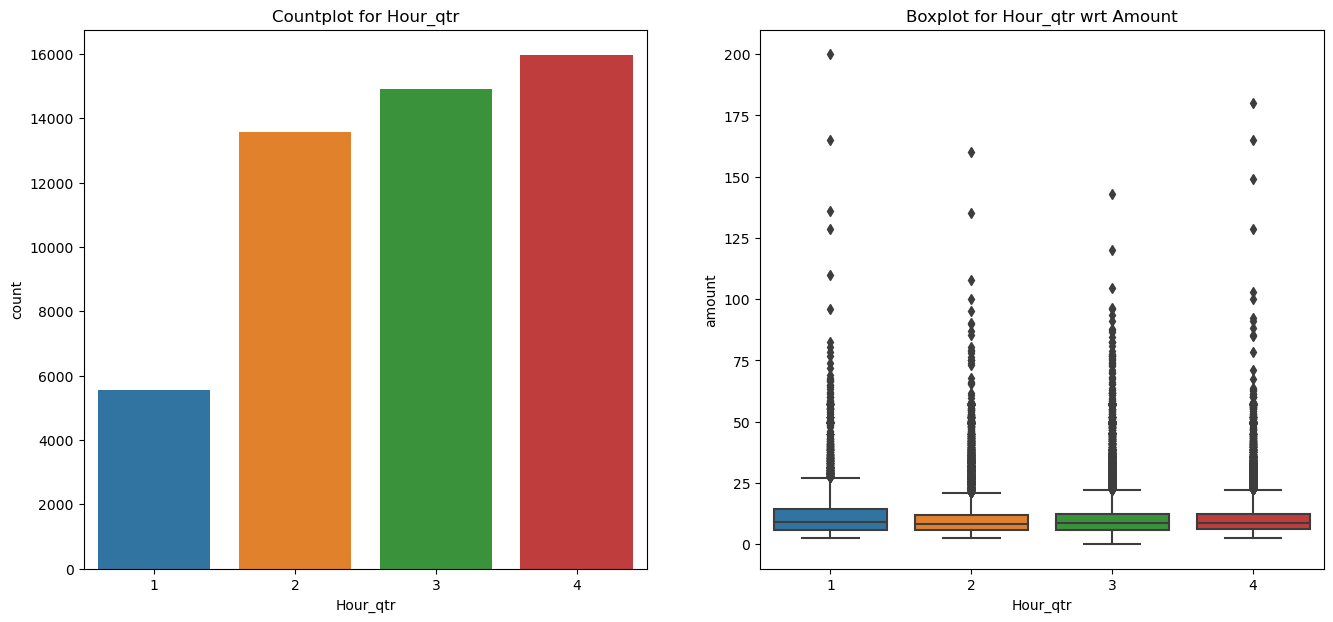

In [32]:
feature_details('Hour_qtr')

In [33]:
df.columns

Index(['unique_id', 'amount', 'datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass#', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'Minute', 'Euclid_dist', 'Manhattan_dist', 'abs_dist_lat',
       'abs_dist_long', 'haversine_dist', 'Hour_qtr'],
      dtype='object')

In [34]:
df['week_div'] = np.where(df['datetime'].dt.weekday.isin([0,1,2,3,4]), 1, 2) # 1 = weekday, 2 = weekend

In [35]:
df.head()

,unique_id,amount,datetime,long_pickup,lat_pickup,long_drop,lat_drop,pass#,Year,Qtr,...,Day,Hour,Minute,Euclid_dist,Manhattan_dist,abs_dist_lat,abs_dist_long,haversine_dist,Hour_qtr,week_div
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,2009,2,...,15,17,26,0.009436,0.011742,0.009041,0.002701,1.031896,3,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,...,5,16,52,0.079696,0.107481,0.070701,0.036780,8.459418,3,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,3,...,18,0,35,0.013674,0.019212,0.010708,0.008504,1.391052,4,1
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,2012,2,...,21,4,30,0.025340,0.029386,0.024949,0.004437,2.802346,1,2
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,1,...,9,7,51,0.019470,0.027194,0.015754,0.011440,2.001353,2,1


Count of Unique Values: 2
1    35845
2    14146
Name: week_div, dtype: int64


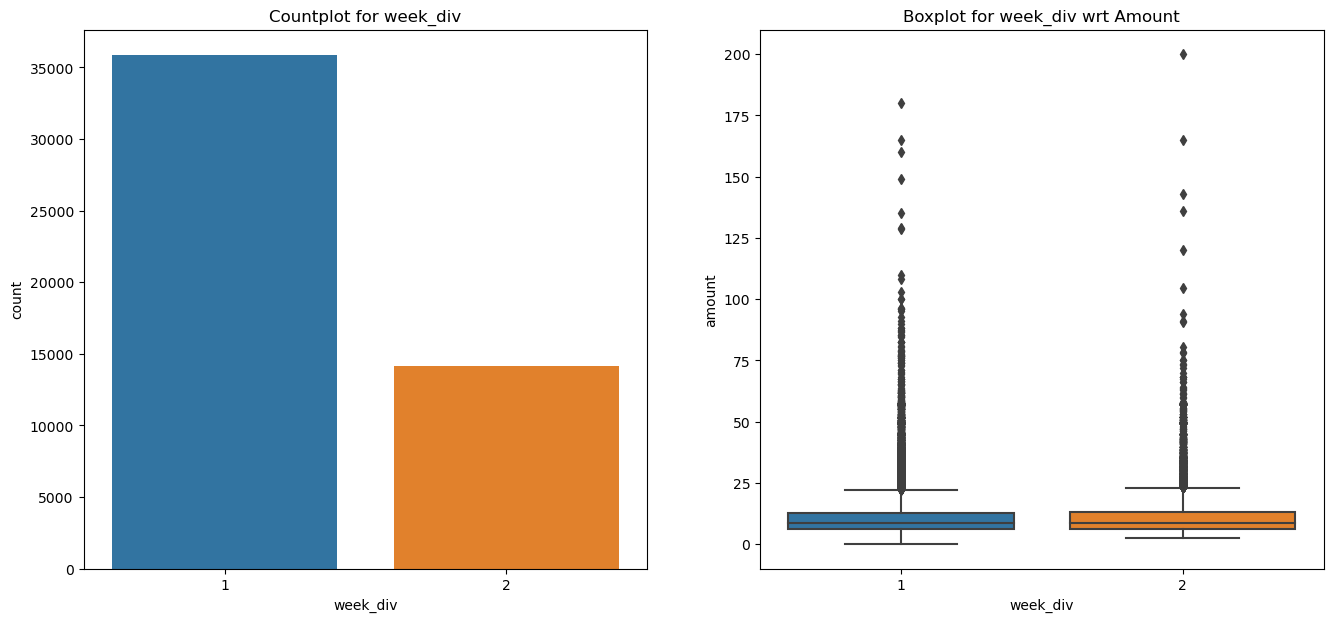

In [36]:
feature_details('week_div')

### Correlation

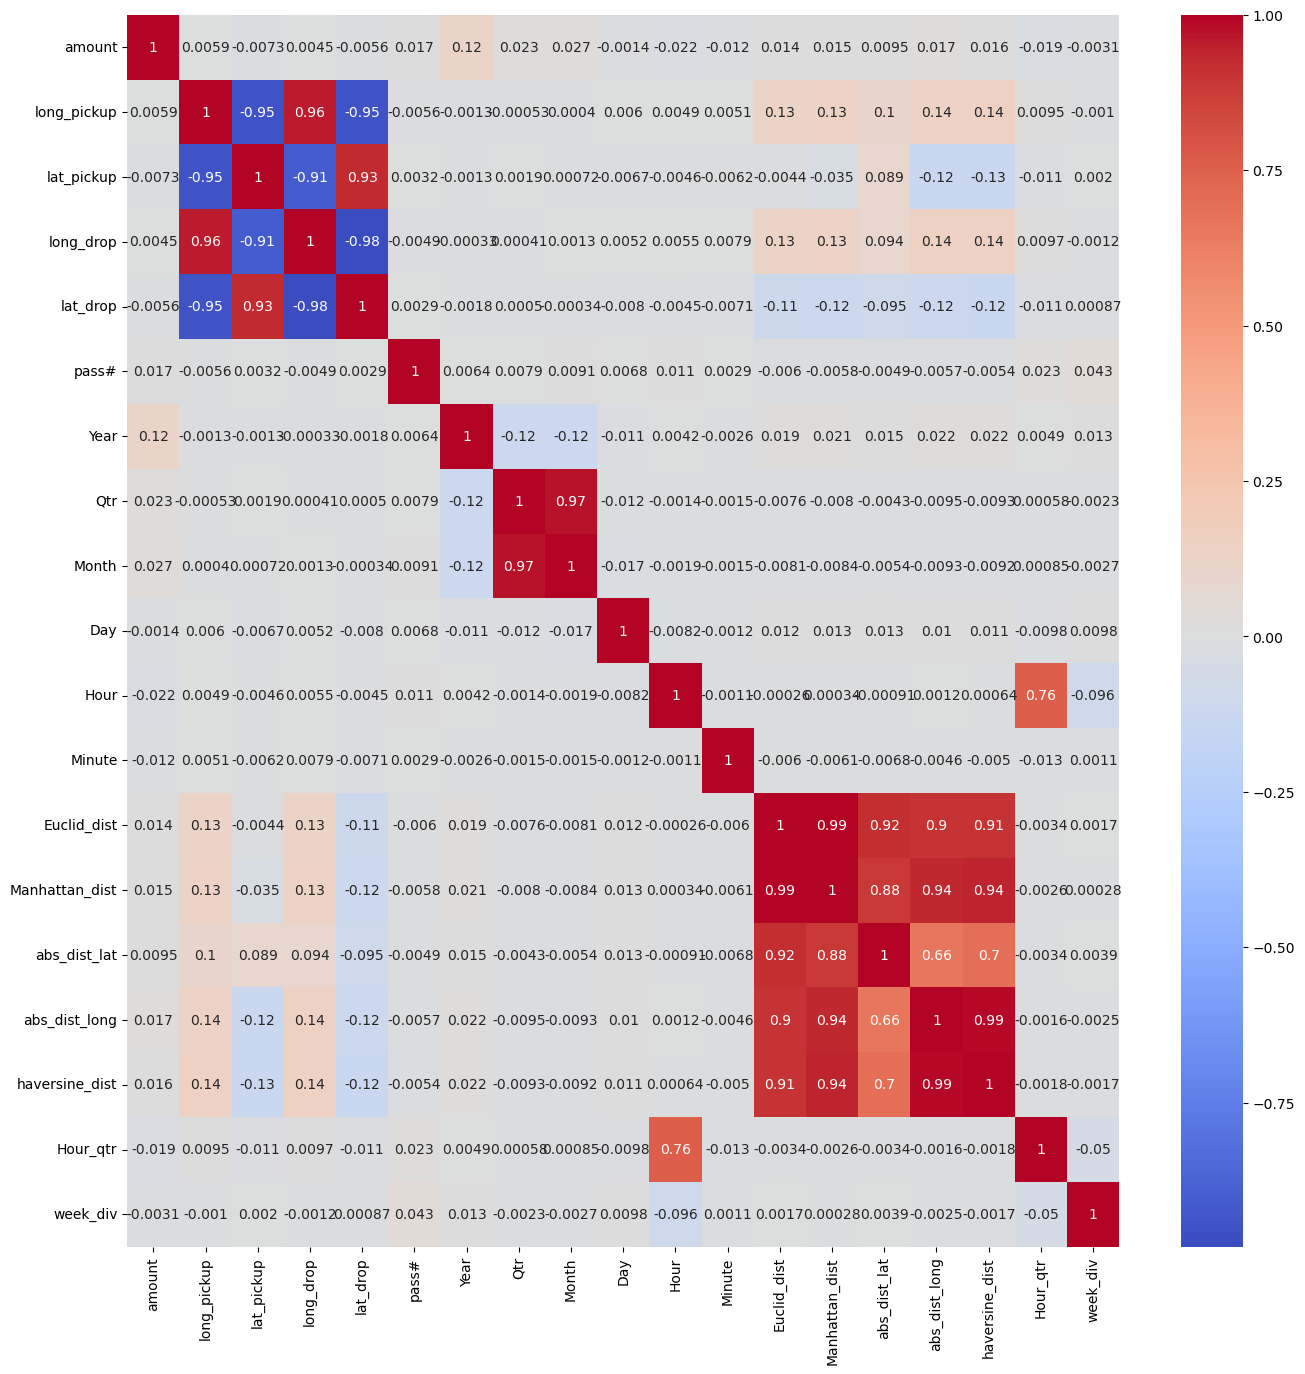

In [37]:
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Amount

/Users/kaushiki/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='amount'>

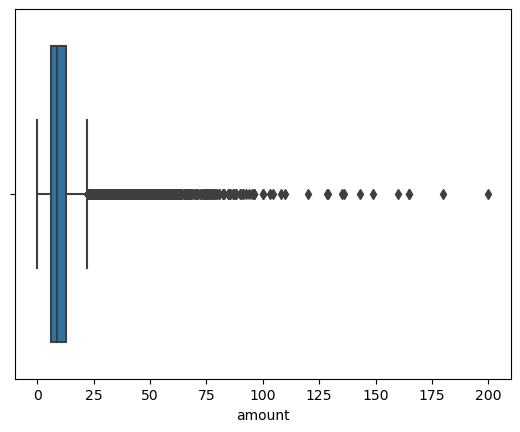

In [38]:
sns.boxplot(df['amount'])

In [39]:
print(df[df['amount']>23].shape)
print(df[df['amount']>23.5].shape)
print(df[df['amount']>24].shape)
print(df[df['amount']>68.5].shape)

(4092, 21)
(3973, 21)
(3828, 21)
(78, 21)


In [40]:
df.describe(percentiles=[0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99]).T

,count,mean,std,min,50%,90%,91%,92%,93%,94%,95%,96%,97%,98%,99%,max
amount,49991.0,11.366585,9.684734,0.010000,8.500000,20.500000,22.000000,23.500000,25.500000,27.700000,30.500000,33.564000,38.330000,46.500000,52.000000,200.000000
long_pickup,49991.0,-72.509497,10.394778,-75.423848,-73.981840,-73.950995,-73.948945,-73.945953,-73.937174,-73.904993,-73.871349,-73.862870,-73.786877,-73.137393,0.000000,40.783472
lat_pickup,49991.0,39.933614,6.225408,-74.006893,40.752679,40.779778,40.780987,40.782360,40.783848,40.785688,40.787795,40.790613,40.794347,40.799603,40.807129,401.083332
long_drop,49991.0,-72.505832,10.403437,-84.654241,-73.980082,-73.944747,-73.940888,-73.935414,-73.923452,-73.910096,-73.873280,-73.864202,-73.801755,-73.434723,0.000000,40.851027
lat_drop,49991.0,39.926919,6.012618,-74.006377,40.753372,40.782897,40.784218,40.786093,40.788175,40.790677,40.794073,40.798798,40.804067,40.810249,40.832503,43.415190
pass#,49991.0,1.667900,1.289241,0.000000,1.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,6.000000,6.000000
Year,49991.0,2011.739053,1.862512,2009.000000,2012.000000,2014.000000,2014.000000,2014.000000,2014.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000,2015.000000
Qtr,49991.0,2.422936,1.121530,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
Month,49991.0,6.273649,3.461255,1.000000,6.000000,11.000000,11.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
Day,49991.0,15.671681,8.660913,1.000000,16.000000,28.000000,28.000000,28.000000,29.000000,29.000000,29.000000,30.000000,30.000000,30.000000,31.000000,31.000000


### Splitting into 2 dataframes 

In [41]:
df_sc = df[df['amount']>23.5]
df_wsc = df[df['amount']<=23.5]

In [42]:
print(df_sc.shape)
print(df_wsc.shape)

(3973, 21)
(46018, 21)


## Model on df_sc

### Selecting dependent and independent features

In [43]:
df_wsc.columns

Index(['unique_id', 'amount', 'datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass#', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'Minute', 'Euclid_dist', 'Manhattan_dist', 'abs_dist_lat',
       'abs_dist_long', 'haversine_dist', 'Hour_qtr', 'week_div'],
      dtype='object')

In [44]:
x1 = df_wsc[['pass#', 'Year', 'Qtr', 'Month', 'Day', 'Hour','Minute', 'Euclid_dist', 'Manhattan_dist', 'abs_dist_lat','abs_dist_long', 'haversine_dist', 'Hour_qtr', 'week_div']]
y1 = df_wsc['amount']
print(x1.shape)
print(y1.shape)
print(type(x1))
print(type(y1))

(46018, 14)
(46018,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [45]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size = 0.25, random_state=25)
print(x1_train.shape)
print(x1_test.shape)
print(y1_train.shape)
print(y1_test.shape)

(34513, 14)
(11505, 14)
(34513,)
(11505,)


### Linear Regression

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr1 = LinearRegression()
lr1.fit(x1_train, y1_train)

LinearRegression()

In [48]:
print('Train score',lr1.score(x1_train,y1_train))
print('Test score',lr1.score(x1_test,y1_test))

Train score 0.02545389799187059
Test score 0.030787859055012246


#### creating a function for Linear Regression metrics

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [50]:
def eval_model(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    ypred_train = model.predict(x_train)
    ypred_test = model.predict(x_test)
    # mae_test = mean_absolute_error(y_test,ypred_test)
    # mae_train = mean_absolute_error(y_train,ypred_train)
    mse_train = mean_squared_error(y_train, ypred_train)
    mse_test = mean_squared_error(y_test, ypred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    print('MSE_train',mse_train)
    print('MSE_test',mse_test)
    print('RMSE_train',rmse_train)
    print('RMSE_test',rmse_test)

### Base Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf_base = RandomForestRegressor()
eval_model(rf_base,x1_train,x1_test,y1_train,y1_test)

MSE_train 0.7090987023964882
MSE_test 4.970898978849196
RMSE_train 0.8420799857474872
RMSE_test 2.2295512954065884


#### Feature Significance

In [53]:
fimp1 = pd.DataFrame({'Features': x1_train.columns, 'Imp': rf_base.feature_importances_})
fimp1 = fimp1.sort_values('Imp', ascending=False)
fimp1

,Features,Imp
7,Euclid_dist,0.621948
11,haversine_dist,0.106592
1,Year,0.045504
10,abs_dist_long,0.033756
6,Minute,0.031793
5,Hour,0.030841
9,abs_dist_lat,0.030293
4,Day,0.027418
8,Manhattan_dist,0.026197
3,Month,0.020116


In [54]:
fimp1.shape

(14, 2)

In [55]:
sign_feat = fimp1.nlargest(11,columns='Imp')['Features'].values
sign_feat

array(['Euclid_dist', 'haversine_dist', 'Year', 'abs_dist_long', 'Minute',
       'Hour', 'abs_dist_lat', 'Day', 'Manhattan_dist', 'Month', 'pass#'],
      dtype=object)

### Random Forest Model

In [56]:
x2 = df_wsc[sign_feat]
y2 = df_wsc['amount']
print(x2.shape)
print(y2.shape)

(46018, 11)
(46018,)


In [57]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size = 0.25, random_state=25)
print(x2_train.shape)
print(x2_test.shape)
print(y2_train.shape)
print(y2_test.shape)

(34513, 11)
(11505, 11)
(34513,)
(11505,)


In [58]:
rf2 = RandomForestRegressor(n_estimators=80, criterion='squared_error',max_depth=10,min_samples_split=30, n_jobs=-1)
eval_model(rf2,x2_train, x2_test, y2_train, y2_test)

MSE_train 3.930389408133553
MSE_test 4.860392934779662
RMSE_train 1.9825209729366176
RMSE_test 2.204629886121401


### GridSearchCV on df_wsc

In [59]:
# from sklearn.model_selection import GridSearchCV

In [60]:
# hparams_rf = {'n_estimators':[60,80,100,120], 'max_depth':[7,8,9,10,11], 'min_samples_split':[20,25,30,35,40]}

In [61]:
# from time import time

In [62]:
# st = time() # start time
# rfmodel = RandomForestRegressor(criterion='squared_error')
# gs = GridSearchCV(estimator=rfmodel, param_grid=hparams_rf, scoring='neg_mean_squared_error',cv=5)
# gs.fit(x2_train, y2_train)
# et = time() # end time
# print('Time consumed', st-et)

## Model on df_sc

### Selecting dependent and independent features

In [63]:
df_sc.columns

Index(['unique_id', 'amount', 'datetime', 'long_pickup', 'lat_pickup',
       'long_drop', 'lat_drop', 'pass#', 'Year', 'Qtr', 'Month', 'Day', 'Hour',
       'Minute', 'Euclid_dist', 'Manhattan_dist', 'abs_dist_lat',
       'abs_dist_long', 'haversine_dist', 'Hour_qtr', 'week_div'],
      dtype='object')

In [64]:
x3 = df_sc[['pass#', 'Year', 'Qtr', 'Month', 'Day', 'Hour','Minute', 'Euclid_dist', 'Manhattan_dist', 'abs_dist_lat','abs_dist_long', 'haversine_dist', 'Hour_qtr', 'week_div']]
y3 = df_sc['amount']
print(x3.shape)
print(y3.shape)
print(type(x3))
print(type(y3))

(3973, 14)
(3973,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [65]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size = 0.25, random_state=25)
print(x3_train.shape)
print(x3_test.shape)
print(y3_train.shape)
print(y3_test.shape)

(2979, 14)
(994, 14)
(2979,)
(994,)


### Random Forest Regression

In [66]:
rf3 = RandomForestRegressor(n_estimators=80, criterion='squared_error',max_depth=10,min_samples_split=30, n_jobs=-1)
eval_model(rf3,x3_train, x3_test, y3_train, y3_test)

MSE_train 66.13552885273606
MSE_test 76.28359682215657
RMSE_train 8.13237535119574
RMSE_test 8.734048134866018


### GridSearchCV on df_sc

In [67]:
# from sklearn.model_selection import GridSearchCV

In [68]:
# hparams_rf = {'n_estimators':[60,80,100,120], 'max_depth':[7,8,9,10,11], 'min_samples_split':[20,25,30,35,40]}

In [69]:
# from time import time

In [ ]:
# st = time() # start time
# rfmodel = RandomForestRegressor(criterion='squared_error')
# gs = GridSearchCV(estimator=rfmodel, param_grid=hparams_rf, scoring='neg_mean_squared_error',cv=5)
# gs.fit(x3_train, y3_train)
# et = time() # end time
# print('Time consumed', st-et)